### Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usage = pd.read_csv('Data/usage.csv')
usage.head()

,user,day,usage
0,00097b5304ac028d14ec093cba2c41f76126fab4,0,0
1,00097b5304ac028d14ec093cba2c41f76126fab4,1,0
2,00097b5304ac028d14ec093cba2c41f76126fab4,2,0
3,00097b5304ac028d14ec093cba2c41f76126fab4,3,0
4,00097b5304ac028d14ec093cba2c41f76126fab4,4,0


In [4]:
mem = pd.read_csv('Data/user_info.csv')
mem.head()

,user,age,gender
0,00097b5304ac028d14ec093cba2c41f76126fab4,67,0
1,002b862b2604247ecfe7c9dc9d5fa41811a93d3e,55,1
2,0036892c09cc30ab1dec9999eb43189af4dd71b4,56,0
3,0040b11703e9dd8d7c8e5b8b46f64d20b642eb71,57,0
4,0048bc445cdbff2bba4963af21e881c8645a6cdb,41,1


1.	Compute the longest run of days where usage=0 for each user (longest_no_usage).

a.	summarize the results visually.

b.	Provide the min, 25%, median, 75% and max in numerical form


In [234]:
# assigning the number of time of usage
usage['times'] = usage.sort_values(['user', 'day']).groupby('user').usage.cumsum()
usage.head()

,user,day,usage,times
0,00097b5304ac028d14ec093cba2c41f76126fab4,0,0,0
1,00097b5304ac028d14ec093cba2c41f76126fab4,1,0,0
2,00097b5304ac028d14ec093cba2c41f76126fab4,2,0,0
3,00097b5304ac028d14ec093cba2c41f76126fab4,3,0,0
4,00097b5304ac028d14ec093cba2c41f76126fab4,4,0,0


In [235]:
# counting the number of gaps
temp = usage.groupby(['user', 'times']).agg('count').day.reset_index()
temp

,user,times,day
0,00097b5304ac028d14ec093cba2c41f76126fab4,0,59
1,00097b5304ac028d14ec093cba2c41f76126fab4,1,1
2,00097b5304ac028d14ec093cba2c41f76126fab4,2,4
3,00097b5304ac028d14ec093cba2c41f76126fab4,3,1
4,00097b5304ac028d14ec093cba2c41f76126fab4,4,2
...,...,...,...
287298,ffe49fb47ef4028061866472b8e9201763cc1816,24,1
287299,ffe49fb47ef4028061866472b8e9201763cc1816,25,2
287300,ffe49fb47ef4028061866472b8e9201763cc1816,26,1
287301,ffe49fb47ef4028061866472b8e9201763cc1816,27,3


In [236]:
# finding the longest not usage for each user
output = temp.groupby('user').day.agg('max')-1
output

user
00097b5304ac028d14ec093cba2c41f76126fab4     58
002b862b2604247ecfe7c9dc9d5fa41811a93d3e     11
0036892c09cc30ab1dec9999eb43189af4dd71b4      1
0040b11703e9dd8d7c8e5b8b46f64d20b642eb71    101
0048bc445cdbff2bba4963af21e881c8645a6cdb      3
                                           ... 
ffc89b8b577bf7c575197f8eeb4469db397d6e53      5
ffccfd84cbe0dc72d54fb866e3d1592ff40a85cd     61
ffdaf16d61f651749c33b8491b487968bff99dba     60
ffe1aaf5638976decbe985debc96af530b8ae63d      3
ffe49fb47ef4028061866472b8e9201763cc1816     42
Name: day, Length: 5149, dtype: int64

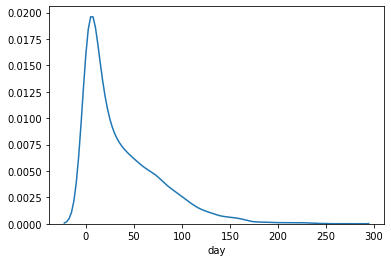

In [237]:
sns.distplot(output, hist=False)

In [238]:
print('the min of user longest day not being usaged:', output.min())
print('the 25% of user longest day not being usaged:', output.quantile(0.25))
print('the median of user longest day not being usaged:', output.median())
print('the max of user longest day not being usaged:', output.max())

the min of user longest day not being usaged: 0
the 25% of user longest day not being usaged: 6.0
the median of user longest day not being usaged: 23.0
the max of user longest day not being usaged: 272


### LSTM

In [12]:
# query the members who do have greater 8 days not usage
mem_list = output[output > 8].index
mem_list

Index(['00097b5304ac028d14ec093cba2c41f76126fab4',
       '002b862b2604247ecfe7c9dc9d5fa41811a93d3e',
       '0040b11703e9dd8d7c8e5b8b46f64d20b642eb71',
       '00510bfdb09f06057ffebc04b259a673dc38cb8b',
       '0074824c7bc3ebea47f098c670947fe1422d5ad0',
       '008092a153c4933e5dfba5aabee2ea97c13a9620',
       '008bcb6164ffbf3839c8511b07412b4ded4d5ce1',
       '008dff2bb55d5aef4de4a2a772a3a86cb1d7ba80',
       '00a209930462551cd6c6c6d4ac2461c7ba4059f0',
       '00a78f39b2e295511861f850fd615747da093f5e',
       ...
       'ff4b3757e1734915ed792ec263367e83cf23e001',
       'ff4e797b3070a03b407d575b08bff2fcd34b4611',
       'ff676ba20aebc67bad5a928e35ed1c79245f723c',
       'ff8c164e2af86297808dc85284cf2859f55ea575',
       'ff9df310b54a6849007a45c971d8a4486e734a71',
       'ffb90d5525e7cae30e99139294e8749549e7ab5b',
       'ffbcc708001792de7a6491ca45e87bae65b02564',
       'ffccfd84cbe0dc72d54fb866e3d1592ff40a85cd',
       'ffdaf16d61f651749c33b8491b487968bff99dba',
       'ffe49fb47ef4

In [158]:
# finding members' first 7 days usage info
train_usage = usage[usage.user.isin(mem_list)].drop(['times'], axis=1).groupby('user').head(8)
train_usage['day'] = list(range(8))*3559

train_mem = mem[mem.user.isin(mem_list)]

df = pd.merge(train_usage, train_mem, right_on='user', left_on='user')
df.head(16)

,user,day,usage,age,gender
0,00097b5304ac028d14ec093cba2c41f76126fab4,0,0,67,0
1,00097b5304ac028d14ec093cba2c41f76126fab4,1,0,67,0
2,00097b5304ac028d14ec093cba2c41f76126fab4,2,0,67,0
3,00097b5304ac028d14ec093cba2c41f76126fab4,3,0,67,0
4,00097b5304ac028d14ec093cba2c41f76126fab4,4,0,67,0
5,00097b5304ac028d14ec093cba2c41f76126fab4,5,0,67,0
6,00097b5304ac028d14ec093cba2c41f76126fab4,6,0,67,0
7,00097b5304ac028d14ec093cba2c41f76126fab4,7,0,67,0
8,002b862b2604247ecfe7c9dc9d5fa41811a93d3e,0,1,55,1
9,002b862b2604247ecfe7c9dc9d5fa41811a93d3e,1,1,55,1


In [160]:
X = df.query('day!=7').drop('user', axis=1)
X = X.values.reshape((3559, 7, -1))
print(X.shape)

y = df.query('day==7').usage.values.reshape((3559, -1))
print(y.shape)

(3559, 7, 4)
(3559, 1)


In [75]:
from keras import Sequential
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  
from keras.models import Model
from keras.layers import Add
from keras.layers import Concatenate
from keras.layers import Dense, concatenate, Input
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
mdl_input1 = Input(shape=(7,2))

x = LSTM(128, activation='tanh', return_sequences=True)(mdl_input1)
x = Dropout(0.2)(x)
mdl_input2 = Input(shape=(7,2))
concat = Concatenate([x, mdl_input2])
x = Dense(64)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model([mdl_input1, mdl_input2], output)

In [183]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit([X_train[:,:,0:2], X_train[:,:,2:4]], y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
17/17 [==============================] - 2s 30ms/step - loss: 0.6540 - accuracy: 0.6489 - val_loss: 0.6016 - val_accuracy: 0.7083
Epoch 2/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5759 - accuracy: 0.7284 - val_loss: 0.5803 - val_accuracy: 0.7203
Epoch 3/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5454 - accuracy: 0.7378 - val_loss: 0.5649 - val_accuracy: 0.7215
Epoch 4/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5322 - accuracy: 0.7443 - val_loss: 0.5602 - val_accuracy: 0.7268
Epoch 5/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5226 - accuracy: 0.7469 - val_loss: 0.5420 - val_accuracy: 0.7340
Epoch 6/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5305 - accuracy: 0.7399 - val_loss: 0.5482 - val_accuracy: 0.7310
Epoch 7/15
17/17 [==============================] - 0s 9ms/step - loss: 0.5225 - accuracy: 0.7441 - val_loss: 0.5393 - val_accuracy: 0.7328
Epoch 8/15
17/17 [=

In [198]:
pred = model.predict([X_test[:,:,0:2], X_test[:,:,2:4]])[:, 0, :]
pred

array([[0.21532252],
       [0.44418183],
       [0.44418183],
       ...,
       [0.44418183],
       [0.44418183],
       [0.21532252]], dtype=float32)

In [232]:
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, plot_precision_recall_curve

In [201]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)
print(precision, recall, thresholds)

[0.31574468 0.43067847 1.        ] [1.         0.78706199 0.        ] [0.21532252 0.44418183]


In [217]:
aucpr = auc(recall, precision)
print('area of precision and recall', aucpr)

area of precision and recall 0.642487251619526


In [196]:
f1 = (2 * precision * recall) / (precision + recall)
f1

array([0.47994825, 0.55672069, 0.        ])

In [239]:
y_pred = [1 if i >= 0.5  else 0 for i in pred]

In [240]:
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.6842553191489362


In [241]:
conf = confusion_matrix(y_test, y_pred)
print('confusion matrix')
conf

confusion matrix


array([[804,   0],
       [371,   0]], dtype=int64)